Temp   -6.3
dtype: float64 Temp    39.2
dtype: float64


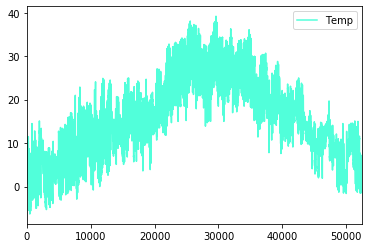

In [20]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns

temp=pd.read_csv("hourlydataOspitaletto.csv",usecols=["Temp"] ,squeeze=True)
df=DataFrame(temp,columns=["Temp"])
mypalette = sns.color_palette(['#51ffda']) # https://www.hsluv.org/
sns.set_palette(mypalette)

df.loc[df['Temp'] == -999, 'Temp'] = 15

df.plot()

print(df.min(),df.max())


,Temp,Month,Day,Hour,Weekday Name
Data-Ora,,,,,
2019-01-01 00:00:00,8.4,1,1,0,Tuesday
2019-01-01 00:10:00,8.8,1,1,0,Tuesday
2019-01-01 00:20:00,9.2,1,1,0,Tuesday
2019-01-01 00:30:00,9.3,1,1,0,Tuesday
2019-01-01 00:40:00,9.4,1,1,0,Tuesday


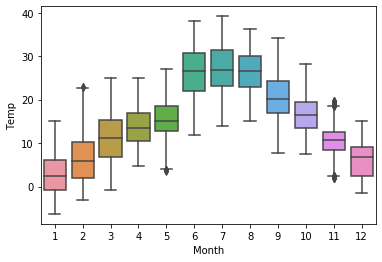

In [22]:
import seaborn as sns

 

df=pd.read_csv("hourlydataOspitaletto.csv",index_col=0, parse_dates=True)

 
df['Data-Ora'] =pd.to_datetime(df['Data-Ora'], infer_datetime_format=True) #Estoy asociando el index de tiempo a la columna Data-Ora

df=df.set_index('Data-Ora')

df.loc[df['Temp'] == -999, 'Temp'] = 14.9 #Sustituye los valores -999 por el promedio

df['Month'] = df.index.month

df['Day'] = df.index.day

df['Hour'] = df.index.hour

df['Weekday Name'] = df.index.day_name()


data=df.loc['2019-01-01 00:00:00': '2019-01-31 00:00:00']

 

#data["Temp"].plot(linewidth=0.5) #Grafica los valores de un periodo determinado en data

#df["Temp"].plot() #Grafica los valores de todo el anio

sns.boxplot(data=df, x='Month', y='Temp');
df.head()

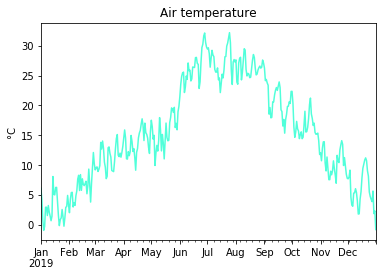

In [23]:
#Este codigo debe ejecutarse después de definir df con un index de tiempo a través de .to_datetime
#Hasta este punto df es un DataFrame con columnas Temp Month Day Hour y Weekday name, con resolucion cada 10min
#import math
from math import cos, sin, exp, sqrt

monthly_df=df["Temp"].resample('D').mean().plot(title='Air temperature') #Es el mismo grafico con resolucion diaria
monthly_df.set_ylabel("°C")
monthly_df.set_xlabel("")
mypalette = sns.color_palette(['#ff91ff']) # https://www.hsluv.org/
sns.set_palette(mypalette)

#T_daily_avg=df["Temp"].resample('D').mean() #columna de valores promedios en escala de tiempo determinada

T_monthly_avg=df["Temp"].resample('D').mean() #Representa los 365 valores con index fecha
T_monthly_avg=T_monthly_avg.reset_index() #Reseteo el index de fecha por uno por defecto
T_monthly_avg["Data-Ora"]= T_monthly_avg.index+1
#T_monthly_avg=T_monthly_avg.reset_index() #Reseteo el index de fecha por uno por defecto
#T_monthly_avg["Time"]= T_monthly_avg.index+1

T_amb_ave_y=df["Temp"].mean() #Promedio de temperatura de todo el dataset
T_max=T_monthly_avg.max() #Maximo de temperatura de todo el dataset
DT_y = T_max-T_amb_ave_y # soil temperature swing Tmax-Tmean
t_0=365*24*3600
t=T_monthly_avg["Data-Ora"] #t represents the number of the day, where t=1-365
T_monthly_avg["Temp"]

t_month=[1,2,3,4,5,6,7,8,9,10,11,12]
t2=pd.Series(t_month)

d_shift=T_monthly_avg["Temp"].idxmin(axis=0) #Indica el día de menor o mayor temperatura de todo el dataset

In [6]:
T_monthly_avg.to_excel(r'/Users/selvacalixto/Desktop/Jupyter/original/hourlydataOspitaletto2.xls') #guarda el dataset con los 365 datos de temperatura

In [24]:

depth_aquifer= float(input("""Aquifer temperature depth:
"""))


Aquifer temperature depth:
30


In [25]:
from math import exp, cos, sqrt, pi, e
zz=1               #Depth [m]
alpha=7e-7      #Ground thermal diffusivity [m^2/s]
dif=0.0000007*3600*24 #Ground thermal diffusivity [m^2/day]


def ground_temperature(t):
 T_g2 = T_amb_ave_y-DT_y*exp(-zz*sqrt(pi/(alpha*t_0)))*cos(2*pi/t_0*(t*24*3600)-d_shift-zz/2*sqrt(t_0/(pi*alpha)))
 return  T_g2

def aquifer_temperature(t):
 T_aq = T_amb_ave_y-DT_y*exp(-depth_aquifer*sqrt(pi/(alpha*t_0)))*cos(2*pi/t_0*(t*24*3600)-d_shift-depth_aquifer/2*sqrt(t_0/(pi*alpha)))
 return  T_aq

def ground_temperature_excel (t2):
    T_g1 = T_amb_ave_y+DT_y*exp(-zz*sqrt(pi/(365*dif)))*cos(2*pi*(15+(t2-1)*30)/365-d_shift-zz/2*sqrt(365/(pi*dif)))
    return T_g1

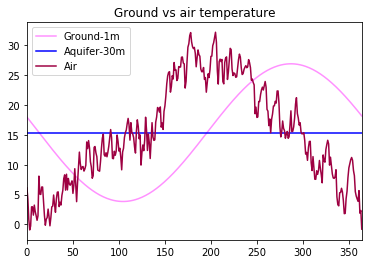

In [26]:
#plt.style.use("seaborn-whitegrid")

T_ground=t.apply(ground_temperature)
T_aquifer=t.apply(aquifer_temperature)

Tg=pd.DataFrame(T_ground)
Taq=pd.DataFrame(T_aquifer)

Tg["Temp"].plot(label="Ground-1m",legend=True) #Ground temperature
Taq["Temp"].plot(label="Aquifer-30m",legend=True, color='blue') #Aquifer temperature
T_monthly_avg["Temp"].plot(title='Ground vs air temperature', label="Air", colormap="Spectral", legend=True)#Air temperature daily resolution
#http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps



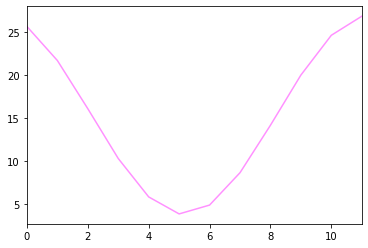

In [64]:
T_ground2=t2.apply(ground_temperature_excel)
Tg2=pd.DataFrame(T_ground2)
Tg2["Temp"].plot()


In [84]:
import matplotlib.pyplot as plt
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']